### About Dataset


Dive into the Extrovert vs. Introvert Personality Traits Dataset, a rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers studying social behavior, personality prediction, or data preprocessing techniques.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#### DataSet overview

In [16]:
df = pd.read_csv('personality_dataset.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [18]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [19]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [23]:
from sklearn.impute import SimpleImputer
# Select the desired columns: 0, 2, 3, 5, 6
selected_columns = [0, 2, 3, 5, 6]

# Create the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit and transform only the selected columns
x[:, selected_columns] = imputer.fit_transform(x[:, selected_columns])

In [24]:
x

array([[4.0, 'No', 4.0, ..., 'No', 13.0, 5.0],
       [9.0, 'Yes', 0.0, ..., 'Yes', 0.0, 3.0],
       [9.0, 'Yes', 1.0, ..., 'Yes', 5.0, 2.0],
       ...,
       [4.0, 'Yes', 1.0, ..., 'Yes', 4.0, 0.0],
       [11.0, 'Yes', 1.0, ..., 'Yes', 2.0, 0.0],
       [3.0, 'No', 6.0, ..., 'No', 6.0, 9.0]], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode column 4 (index 3)
x[:, 4] = le.fit_transform(x[:, 4])

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x[:, 1] = le.fit_transform(x[:, 1])

In [28]:
x

array([[4.0, 0, 4.0, ..., 0, 13.0, 5.0],
       [9.0, 1, 0.0, ..., 1, 0.0, 3.0],
       [9.0, 1, 1.0, ..., 1, 5.0, 2.0],
       ...,
       [4.0, 1, 1.0, ..., 1, 4.0, 0.0],
       [11.0, 1, 1.0, ..., 1, 2.0, 0.0],
       [3.0, 0, 6.0, ..., 0, 6.0, 9.0]], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode column 4 (index 3)
y = le.fit_transform(y)

In [30]:
y

array([0, 1, 1, ..., 1, 1, 0])

### split data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

## Apply KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)

In [35]:
# To compare performance
acc = accuracy_score(y_test, y_hat_knn)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_knn)
print(report)

Model accuracy was 91.38%
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       318
           1       0.88      0.94      0.91       262

    accuracy                           0.91       580
   macro avg       0.91      0.92      0.91       580
weighted avg       0.92      0.91      0.91       580



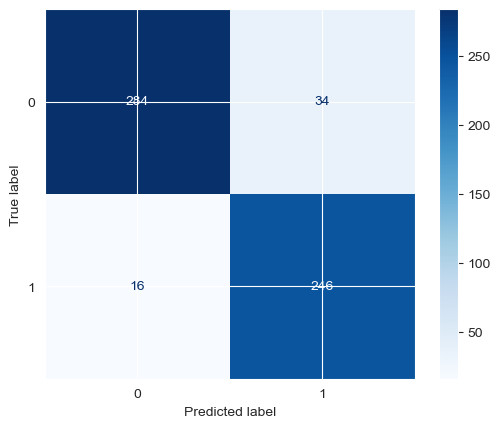

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_knn, cmap=plt.cm.Blues)
plt.show()

## Naive Bayes Classifier

In [37]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_hat_nb = nb.predict(X_test)

In [45]:
acc = accuracy_score(y_test, y_hat_nb)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_nb)
print(report)

Model accuracy was 91.72%
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       318
           1       0.88      0.94      0.91       262

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



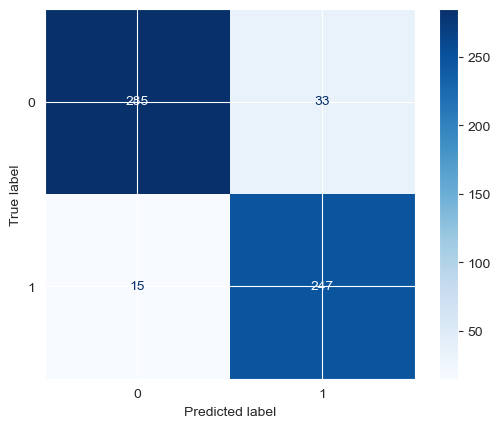

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_nb, cmap=plt.cm.Blues)
plt.show()

## Logistic Regression

In [42]:
lr = LogisticRegression(multi_class='ovr') 
lr.fit(X_train, y_train)
y_hat_lr = lr.predict(X_test)

C:\Users\DRT\.conda\envs\DST_7\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [44]:
acc = accuracy_score(y_test, y_hat_lr)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_lr)
print(report)

Model accuracy was 91.72%
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       318
           1       0.88      0.94      0.91       262

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



### lets create a model to predict new input features

In [49]:
# User Input for New Data and Personality Prediction

print("=== Personality Prediction System ===")
print("Please enter the following information:")
print()

# Get user input for each feature
Time_spent_Alone = float(input("Time spent alone (hours per day): "))

# Stage fear input (Yes/No)
stage_fear_input = input("Stage fear (Yes/No): ").strip().lower()
Stage_fear = 1 if stage_fear_input in ['yes', 'y'] else 0

Social_event_attendance = float(input("Social event attendance (events per month): "))
Going_outside = float(input("Going outside (times per week): "))

# Drained after socializing input (Yes/No)
drained_input = input("Drained after socializing (Yes/No): ").strip().lower()
Drained_after_socializing = 1 if drained_input in ['yes', 'y'] else 0

Friends_circle_size = float(input("Friends circle size (number of close friends): "))
Post_frequency = float(input("Post frequency (posts per week): "))

# Create the new data point
new_data = [[Time_spent_Alone, Stage_fear, Social_event_attendance, 
             Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency]]

print("\n=== Input Summary ===")
print(f"Time spent alone: {Time_spent_Alone}")
print(f"Stage fear: {'Yes' if Stage_fear == 1 else 'No'}")
print(f"Social event attendance: {Social_event_attendance}")
print(f"Going outside: {Going_outside}")
print(f"Drained after socializing: {'Yes' if Drained_after_socializing == 1 else 'No'}")
print(f"Friends circle size: {Friends_circle_size}")
print(f"Post frequency: {Post_frequency}")

# Scale the new data using the same scaler
new_data_scaled = sc.transform(new_data)

# Make prediction
prediction = knn.predict(new_data_scaled)
prediction_proba = knn.predict_proba(new_data_scaled)

# Convert prediction back to personality type
# Assuming 0 = Introvert, 1 = Extrovert (based on your label encoding)
personality_type = "Extrovert" if prediction[0] == 1 else "Introvert"

print(f"\n=== Prediction Result ===")
print(f"Predicted Personality Type: {personality_type}")
print(f"Confidence: {max(prediction_proba[0]) * 100:.2f}%")
print(f"Probability - Introvert: {prediction_proba[0][0] * 100:.2f}%")
print(f"Probability - Extrovert: {prediction_proba[0][1] * 100:.2f}%")

=== Personality Prediction System ===
Please enter the following information:


=== Input Summary ===
Time spent alone: 5.0
Stage fear: No
Social event attendance: 12.0
Going outside: 6.0
Drained after socializing: No
Friends circle size: 12.0
Post frequency: 6.0

=== Prediction Result ===
Predicted Personality Type: Introvert
Confidence: 100.00%
Probability - Introvert: 100.00%
Probability - Extrovert: 0.00%
